In [533]:
#Load libraries
import os
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
#from fancyimpute import KNN
import datetime

In [534]:
#working directory

In [535]:
os.chdir("C:/Users/hp/OneDrive/Documents/edwisor/project")

In [536]:
#loadind dataset

In [537]:
bike_df=pd.read_csv("C:/Users/hp/Downloads/day.csv")

In [538]:
os.getcwd()

'C:\\Users\\hp\\OneDrive\\Documents\\edwisor\\project'

In [539]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [540]:
#exploratory data analysis

In [541]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [544]:
#changing season,yr,mnth,holiday,weekday,weekday,workingday,weathersit into categorical variable
#converting respective variables to required data format

In [545]:
#bike_df['dteday']=pd.to_datetime(bike_df['dteday'],yearfirst=True)
d1=bike_df['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=datetime.datetime.strptime(d1[i],'%Y-%m-%d').strftime('%d')
bike_df['dteday']=d1
bike_df['dteday']=bike_df.dteday.astype('category')
bike_df['season']=bike_df.season.astype('category')
bike_df['yr']=bike_df.yr.astype('category')
bike_df['mnth']=bike_df.mnth.astype('category')
bike_df['holiday']=bike_df.holiday.astype('category')
bike_df['weekday']=bike_df.weekday.astype('category')
bike_df['workingday']=bike_df.workingday.astype('category')
bike_df['weathersit']=bike_df.weathersit.astype('category')

ValueError: time data '01' does not match format '%Y-%m-%d'

In [ ]:
bike_df.dtypes

In [ ]:
bike_df.head()

In [ ]:
##missing value analysis

In [ ]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bike_df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bike_df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [ ]:
missing_val

In [ ]:
##there is no missing value in the dataframe

In [ ]:
sns.distplot(bike_df['cnt'])#to check whether target variable is normal or not

In [ ]:
sns.distplot(bike_df['temp'])#to check whether temp vartemple is normal or not

In [ ]:
sns.distplot(bike_df['atemp'])#to check whether atemp variable is normal or not

In [ ]:
sns.distplot(bike_df['hum'])#to check whether hum variable is normal or not

In [ ]:
sns.distplot(bike_df['windspeed'])#to check whether windspeed variable is normal or not

In [ ]:
sns.distplot(bike_df['casual'])#to check whether casual variable is normal or not

In [ ]:
sns.distplot(bike_df['registered'])#to check whether registered variable is normal or not

In [ ]:
##from above plots we can see that there is high chance of getting outliers in hum,casual,and windspeed varianbles

In [ ]:
###Outlier Analysis

In [ ]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(bike_df['cnt'])

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['registered','casual']])
ax.set_title('Users')
plt.show()
##positive outliers found in casual

In [ ]:
##Detect and delete outliers

In [ ]:
cnames=["temp","atemp","hum","windspeed","casual","registered"]
for i in cnames:
    print(i)
    q75, q25 = np.percentile(bike_df.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    bike_df = bike_df.drop(bike_df[bike_df.loc[:,i] < min].index)
    bike_df = bike_df.drop(bike_df[bike_df.loc[:,i] > max].index)

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['temp','windspeed','hum']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike_df[['registered','casual']])
ax.set_title('Users')
plt.show()

In [ ]:
##Feature Selection on the basis of various features like correlation,multicollinearity

In [ ]:
##Correlation analysis
#Correlation plot
cnames=["temp","atemp","hum","windspeed","casual","registered","cnt"]
df_corr = bike_df.loc[:,cnames]

In [ ]:
df_corr

In [ ]:
#Generate correlation matrix
corr = df_corr.corr()

In [ ]:
corr

In [ ]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
##variable temp and atemp are highly positively correlated to each other

In [ ]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["yr", "mnth", "weathersit", "workingday", "weekday", "holiday", "season"]

In [ ]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_df['cnt'], bike_df[i]))
    print(p)
    print(dof)

In [546]:
bike_df = bike_df.drop(['atemp'], axis=1) ##drop atemp variable

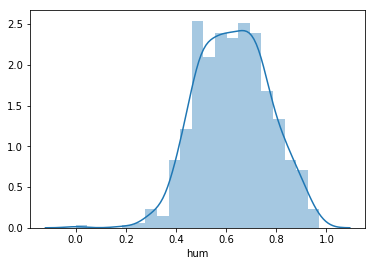

In [547]:
sns.distplot(bike_df['hum'])

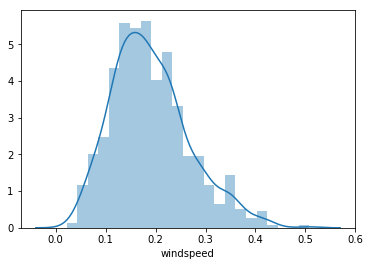

In [548]:
sns.distplot(bike_df['windspeed'])

In [549]:
##Feature Scaling

In [550]:
df = bike_df.copy()
#marketing_train = df.copy()

(array([ 1.,  0.,  0.,  0.,  1.,  2.,  8.,  5., 28., 41., 86., 71., 81.,
        79., 85., 81., 57., 45., 28., 24.,  8.]),
 array([0.        , 0.04630952, 0.09261905, 0.13892857, 0.1852381 ,
        0.23154762, 0.27785714, 0.32416667, 0.37047619, 0.41678571,
        0.46309524, 0.50940476, 0.55571429, 0.60202381, 0.64833333,
        0.69464286, 0.74095238, 0.7872619 , 0.83357143, 0.87988095,
        0.92619048, 0.9725    ]),
 <a list of 21 Patch objects>)

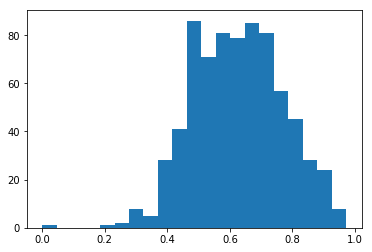

In [551]:
#Normality check
%matplotlib inline  
plt.hist(bike_df['hum'], bins='auto')

(array([ 4., 24., 45., 97., 84., 76., 61., 76., 91., 94., 63., 16.]),
 array([0.0591304 , 0.12600845, 0.1928865 , 0.25976455, 0.3266426 ,
        0.39352065, 0.4603987 , 0.52727675, 0.5941548 , 0.66103285,
        0.7279109 , 0.79478895, 0.861667  ]),
 <a list of 12 Patch objects>)

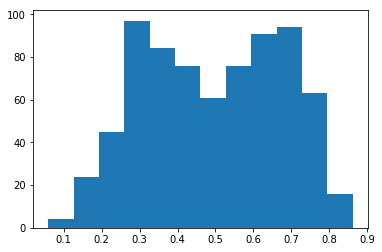

In [552]:
#Normality check
%matplotlib inline  
plt.hist(bike_df['temp'], bins='auto')

In [553]:
cnames=["casual","registered"]

In [554]:
for i in cnames:
    print(i)
    bike_df[i] = (bike_df[i] - (bike_df[i].min()))/((bike_df[i].max()) -(bike_df[i].min()))

casual
registered


In [555]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,0.096538,0.091539,985
1,2,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,0.037852,0.093849,801
2,3,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,0.034624,0.174560,1349
3,4,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,0.031103,0.207046,1562
4,5,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,0.023474,0.216286,1600


In [556]:
bike_df = bike_df.drop(['casual','registered','instant'], axis=1) ##drop casual,registered variable

In [557]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [558]:
#Model Selection

In [559]:
#Decision Tree

In [560]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
#from fancyimpute import KNN

In [561]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [562]:
##Linear Regression

In [563]:
bike_df.iloc[:,10]

0      0.160446
1      0.248539
2      0.248309
3      0.160296
4      0.186900
5      0.089565
6      0.168726
7      0.266804
8      0.361950
9      0.223267
10     0.122132
11     0.304627
12     0.301000
13     0.126548
14     0.157963
15     0.188433
16     0.194017
17     0.146775
18     0.208317
19     0.195904
20     0.353242
21     0.171970
22     0.246600
23     0.158330
24     0.129796
25     0.293850
26     0.113837
27     0.123300
28     0.145365
29     0.073983
         ...   
701    0.124379
702    0.082721
703    0.174129
704    0.324021
705    0.174754
706    0.130600
707    0.101379
708    0.157975
709    0.190308
710    0.296037
711    0.162937
712    0.174129
713    0.131229
714    0.106350
715    0.100742
716    0.098258
717    0.221404
718    0.184092
719    0.132463
720    0.374383
721    0.407346
722    0.133083
723    0.077230
724    0.168726
725    0.316546
726    0.350133
727    0.155471
728    0.124383
729    0.350754
730    0.154846
Name: windspeed, Length:

In [564]:
np.asarray(bike_df)

array([['01', 1, 0, ..., 0.805833, 0.160446, 985],
       ['02', 1, 0, ..., 0.696087, 0.24853899999999998, 801],
       ['03', 1, 0, ..., 0.43727299999999997, 0.248309, 1349],
       ...,
       ['29', 1, 1, ..., 0.7529170000000001, 0.124383, 1341],
       ['30', 1, 1, ..., 0.483333, 0.350754, 1796],
       ['31', 1, 1, ..., 0.5775, 0.154846, 2729]], dtype=object)

In [565]:
def modeling(data,target,drop_cols,split=0.25):
    new_data=data.drop(drop_cols,axis=1)
    X=new_data.drop([target],axis=1)
    y=new_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=split,random_state=42)
    print("train shape",X_train.shape)
    print("test shape",X_test.shape)
    return X_train, X_test, y_train, y_test
    return new_data

In [566]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [567]:
X_train, X_test, y_train, y_test=modeling(bike_df,'cnt',drop_cols=['dteday'],split=0.2)

train shape (584, 10)
test shape (147, 10)


In [568]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [569]:
bike_df.dtypes

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [570]:

#Decision tree for regression
from sklearn.tree import DecisionTreeRegressor
fit_DT = DecisionTreeRegressor(max_depth=6,random_state=42).fit(X_train, y_train)

In [571]:
predictions_DT = fit_DT.predict(X_test)

In [572]:
predictions_DT

array([7601.67647059, 1803.48484848, 3539.14285714, 6047.85714286,
       7601.67647059, 6866.29761905, 1803.48484848, 2331.06666667,
       6866.29761905, 5691.25      , 2163.7       , 2331.06666667,
       4720.38297872, 5087.13333333, 1803.48484848, 1803.48484848,
       1803.48484848, 7601.67647059, 4720.38297872, 2163.7       ,
       6866.29761905, 6040.73333333, 6047.85714286, 1803.48484848,
       1803.48484848, 4720.38297872, 2331.06666667, 7601.67647059,
       3019.1       , 6047.85714286, 3539.14285714, 4183.65957447,
       6866.29761905, 6866.29761905, 6866.29761905, 5421.75      ,
       6866.29761905, 6866.29761905, 3331.75      , 1032.57142857,
       4720.38297872, 3019.1       , 6866.29761905, 4183.65957447,
       6866.29761905, 1607.        , 4720.38297872, 6866.29761905,
       6866.29761905, 5421.75      , 4183.65957447, 3539.14285714,
       1803.48484848, 4720.38297872, 4720.38297872, 4183.65957447,
       4183.65957447, 3331.75      , 4720.38297872, 6040.73333

In [573]:
from sklearn.metrics import mean_squared_error
dt_rmse=np.sqrt(mean_squared_error(predictions_DT,y_test))
print("RMSE = ",dt_rmse)


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, predictions_DT)

RMSE =  857.7735886861213


184.03308665877907

In [574]:
y_test

703    6606
33     1550
300    3747
456    6041
633    7538
557    7264
39     1605
356    2209
559    7499
514    5743
729    1796
355    3068
164    4891
697    5260
66     2133
78     2471
72     2046
643    8156
181    5362
380    2298
606    7697
545    5463
467    5409
65     1872
54     1807
235    5130
81     2121
632    7436
404    3830
717    5557
       ... 
369    3272
196    5923
375    2177
468    6398
319    1817
76     3239
2      1349
331    3867
690    5146
199    4541
314    3368
60     2134
568    7410
302    3331
306    3974
683    5495
711    5319
234    5895
90     2227
473    4367
469    7460
69     1977
212    4266
131    4864
44     1913
70     2132
192    4258
328    2792
165    5180
135    3958
Name: cnt, Length: 147, dtype: int64

In [575]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       2.871
Model:                            OLS   Adj. R-squared:                  2.895
Method:                 Least Squares   F-statistic:                    -116.8
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               1.00
Time:                        13:26:39   Log-Likelihood:                -4649.1
No. Observations:                 540   AIC:                             9312.
Df Residuals:                     533   BIC:                             9342.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season      1208.8795     91.074     13.274      0.000    1029.971    1387.788
yr          2333.5820    111.341     20.959      0.000    2114.861    2552.303
mnth         -84.0908     30.296     -2.776      0.006    -143.605     -24.577
holiday      127.5465    358.241      0.356      0.722    -576.190     831.283
weekday      141.5487     28.142      5.030      0.000      86.265     196.832
workingday  1081.6860    124.750      8.671      0.000     836.624    1326.748
weathersit  -425.4450     86.117     -4.940      0.000    -594.616    -256.274
temp                0          0        nan        nan           0           0
hum                 0          0        nan        nan           0           0
windspeed           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       33.308   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.194
Skew:                          -0.476   Prob(JB):                     2.08e-11
Kurtosis:                       4.131   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [576]:
y_pred1=model1.predict(X_test)

In [577]:
lm_rmse=np.sqrt(mean_squared_error(y_pred1, y_test))
print("RMSE for Linear Regression is ",lm_rmse)

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, y_pred1)

RMSE for Linear Regression is  1461.8823991854465


225.8676447052994

In [578]:
##### Now lets try another linear regression by changing split

In [579]:
X_train1, X_test1, y_train1, y_test1=modeling(bike_df,'cnt',drop_cols=['dteday'],split=0.3)

train shape (511, 10)
test shape (220, 10)


In [580]:
# Train the model using the training sets
model2 = sm.OLS(y_train1.astype(int), X_train1.astype(int)).fit()

In [581]:
model2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       3.397
Model:                            OLS   Adj. R-squared:                  3.430
Method:                 Least Squares   F-statistic:                    -102.0
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               1.00
Time:                        13:26:40   Log-Likelihood:                -4424.8
No. Observations:                 511   AIC:                             8864.
Df Residuals:                     504   BIC:                             8893.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season      1319.1428     99.061     13.316      0.000    1124.520    1513.766
yr          2419.6765    119.485     20.251      0.000    2184.926    2654.427
mnth        -109.7296     33.731     -3.253      0.001    -176.000     -43.459
holiday      248.7891    388.269      0.641      0.522    -514.036    1011.615
weekday      168.7174     28.743      5.870      0.000     112.246     225.189
workingday   795.4090    127.374      6.245      0.000     545.159    1045.659
weathersit  -325.0401     92.669     -3.508      0.000    -507.105    -142.975
temp                0          0        nan        nan           0           0
hum                 0          0        nan        nan           0           0
windspeed           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       16.099   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.216
Skew:                          -0.320   Prob(JB):                     4.07e-05
Kurtosis:                       3.735   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [582]:
y_pred2=model2.predict(X_test1)

In [583]:
lm_rmse=np.sqrt(mean_squared_error(y_pred2, y_test1))
print("RMSE for Linear Regression is ",lm_rmse)
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, y_pred2)

RMSE for Linear Regression is  1412.8181322488579


236.46175145118437

In [584]:
###Random Forest###################

In [585]:
from sklearn.ensemble import RandomForestRegressor
fit_RF = RandomForestRegressor(n_estimators = 50,random_state=42).fit(X_train,y_train)

In [586]:
prediction_RF=fit_RF.predict(X_test)


In [587]:
#### Lets use RMSE to test accuracy of the Model

In [588]:
rf_rmse=np.sqrt(mean_squared_error(prediction_RF,y_test))
print("RMSE = ",rf_rmse)
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, prediction_RF)

RMSE =  682.9606957884449


140.32622440626056

In [589]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
703,4,1,12,0,2,1,1,0.475833,0.733750,0.174129
33,1,0,2,0,4,1,1,0.186957,0.437826,0.277752
300,4,0,10,0,5,1,2,0.330833,0.585833,0.229479
456,2,1,4,0,0,0,2,0.425833,0.676250,0.172267
633,4,1,9,0,2,1,1,0.550000,0.570000,0.236321
557,3,1,7,0,3,1,1,0.716667,0.633333,0.151733
39,1,0,2,0,3,1,2,0.134783,0.494783,0.188839
356,1,0,12,0,5,1,1,0.373333,0.686250,0.274246
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850
514,2,1,5,0,2,1,1,0.722500,0.684583,0.295400


In [590]:
X_test['predicted_cnt']=prediction_RF

In [591]:
X_test

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,predicted_cnt
703,4,1,12,0,2,1,1,0.475833,0.733750,0.174129,6640.98
33,1,0,2,0,4,1,1,0.186957,0.437826,0.277752,1593.12
300,4,0,10,0,5,1,2,0.330833,0.585833,0.229479,3437.90
456,2,1,4,0,0,0,2,0.425833,0.676250,0.172267,5199.80
633,4,1,9,0,2,1,1,0.550000,0.570000,0.236321,7389.40
557,3,1,7,0,3,1,1,0.716667,0.633333,0.151733,7339.06
39,1,0,2,0,3,1,2,0.134783,0.494783,0.188839,1522.46
356,1,0,12,0,5,1,1,0.373333,0.686250,0.274246,2272.28
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850,7430.84
514,2,1,5,0,2,1,1,0.722500,0.684583,0.295400,6552.90


In [592]:
df=bike_df.copy()
#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)





# ## Linear Regression

# In[ ]:


#Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
X=train.iloc[:,11]
Y=train.iloc[:,0:11]
model = sm.OLS(X.astype(int),Y.astype(int) ).fit()


In [593]:

# Print out the statistics
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.875
Date:                Thu, 03 Oct 2019   Prob (F-statistic):             0.0614
Time:                        13:26:46   Log-Likelihood:                -5047.0
No. Observations:                 584   AIC:                         1.011e+04
Df Residuals:                     576   BIC:                         1.014e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dteday        25.9604      5.956      4.359      0.000      14.263      37.658
season      1338.9125     91.594     14.618      0.000    1159.013    1518.812
yr          2412.4365    110.850     21.763      0.000    2194.718    2630.155
mnth        -129.5465     30.705     -4.219      0.000    -189.853     -69.240
holiday      144.8283    348.126      0.416      0.678    -538.922     828.579
weekday      132.1339     27.367      4.828      0.000      78.383     185.885
workingday   600.6848    119.487      5.027      0.000     366.002     835.368
weathersit  -404.7940     89.097     -4.543      0.000    -579.788    -229.800
temp                0          0        nan        nan           0           0
hum                 0          0        nan        nan           0           0
windspeed           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       21.226   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.037
Skew:                          -0.374   Prob(JB):                     2.22e-06
Kurtosis:                       3.714   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [594]:
# make the predictions by the model
predictions_LR = model.predict(Y.astype(int)) 


# In[ ]:

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(X, predictions_LR)


# In[ ]:


#Error = 19.06


33.063324484419056

In [595]:
rf_rmse1=np.sqrt(mean_squared_error(predictions_LR,X))
print("RMSE = ",rf_rmse1)

RMSE =  1370.7356375040745


In [596]:

######Extracting predicted values output from Rndom Forest Model#####################

In [597]:
results=pd.DataFrame(test.iloc[:,0:11])
results['pred_cnt']=(prediction_RF)
results.to_csv("Bike Renting Output Python.csv",index=False)